In [126]:
# 1 Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [173]:
Archivo = pd.read_csv("./heart_cleveland_upload.csv")

In [105]:
Archivo.head(300)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [106]:
Archivo.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Relación entre Edad y Colesterol')

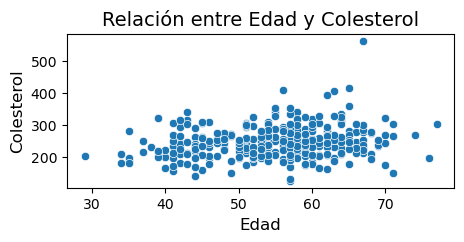

In [107]:
plt.figure(figsize=(5, 2))
sns.scatterplot(x="age", y="chol", data=Archivo)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Colesterol", fontsize=12)
plt.title("Relación entre Edad y Colesterol", fontsize=14)


Text(0.5, 1.0, 'Gráfica de valores atípicos de cp')

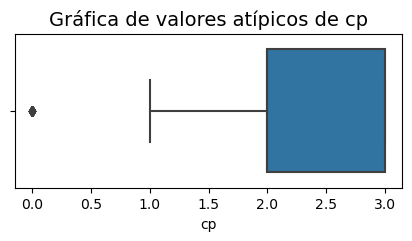

In [108]:
plt.figure(figsize=(5, 2))
sns.boxplot(x=Archivo["cp"])
plt.title("Gráfica de valores atípicos de cp", fontsize=14)


Text(0.5, 1.0, 'Gráfica de valores atípicos de exang')

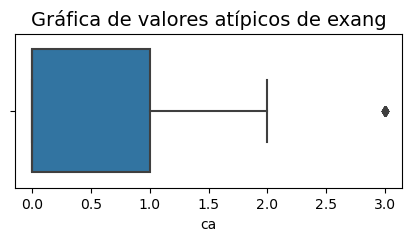

In [112]:
plt.figure(figsize=(5, 2))
sns.boxplot(x=Archivo["ca"])
plt.title("Gráfica de valores atípicos de ca / ", fontsize=14)

Text(0.5, 1.0, 'Gráfica de valores atípicos de oldpeak ')

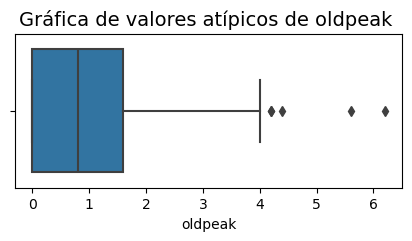

In [124]:
plt.figure(figsize=(5, 2))
sns.boxplot(x=Archivo["oldpeak"])
plt.title("Gráfica de valores atípicos de oldpeak ", fontsize=14)

In [127]:
# 2 Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [129]:
print("Registros con valor 0 en cp:", (Archivo["cp"] == 0).sum()) 
#Consulta de valor de cp con 23 registros en 0


Registros con valor 0 en cp: 23


In [133]:
Archivo["cp"]=Archivo["cp"].replace(0,Archivo["cp"].mean())
#Reemplazo de valores en 0 por la media 

In [134]:
print("Registros con valor 0 en cp:", (Archivo["cp"] == 0).sum()) 
#Consulta de registros con valor 0 una vez reemplazados los datos

Registros con valor 0 en cp: 0


In [141]:
conteo_minimo=0
conteo_maximo=5
Total_atipicos=((Archivo["oldpeak"]<conteo_minimo)|(Archivo["oldpeak"]>conteo_maximo)).sum()
print ("La cantidad de datos atípicos corresponde a {}".format(Total_atipicos))

La cantidad de datos atípicos corresponde a 2


In [148]:
Archivo=Archivo[(Archivo["oldpeak"]<conteo_maximo)&(Archivo["oldpeak"]>conteo_minimo)]

In [166]:
Archivo["oldpeak"]=Archivo["oldpeak"].replace(6.2,Archivo["oldpeak"].mean())

In [168]:
conteo_minimo=0
conteo_maximo=5
Total_atipicos=((Archivo["oldpeak"]<conteo_minimo)|(Archivo["oldpeak"]>conteo_maximo)).sum()
print ("La cantidad de datos atípicos corresponde a {}".format(Total_atipicos))
#Ahora hacemos reemplazo de los valores atípicos por la media y ya no se encuentran resultados en la busqueda

La cantidad de datos atípicos corresponde a 0


In [158]:
conteo_minimo=100
conteo_maximo=160
Total_atipicos=((Archivo["trestbps"]<conteo_minimo)|(Archivo["trestbps"]>conteo_maximo)).sum()
print ("La cantidad de datos atípicos corresponde a {}".format(Total_atipicos))

La cantidad de datos atípicos corresponde a 0


In [164]:
Archivo=Archivo[(Archivo["trestbps"]<conteo_maximo)&(Archivo["trestbps"]>conteo_minimo)]

In [165]:
Archivo["trestbps"]=Archivo["trestbps"].replace(200,Archivo["trestbps"].mean())
#Para estos valores atípicos hacemos reemplazo de los valores por la media

In [149]:
Archivo.info(300)

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        0 non-null      int64  
 1   sex        0 non-null      int64  
 2   cp         0 non-null      float64
 3   trestbps   0 non-null      int64  
 4   chol       0 non-null      int64  
 5   fbs        0 non-null      int64  
 6   restecg    0 non-null      int64  
 7   thalach    0 non-null      int64  
 8   exang      0 non-null      int64  
 9   oldpeak    0 non-null      float64
 10  slope      0 non-null      int64  
 11  ca         0 non-null      int64  
 12  thal       0 non-null      int64  
 13  condition  0 non-null      int64  
dtypes: float64(2), int64(12)
memory usage: 0.0 bytes


In [151]:
# 3 Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [184]:
Archivo["condition"].value_counts()
# En este conteo tenemos los pacientes con riesgo de enfermedad cardiaca, correspondiendo 
0= no hay riesgo de enfermedad
1= si hay riesgo de enfermedad

condition
0    160
1    137
Name: count, dtype: int64

In [187]:
Archivo[["condition"]].head(300)

,condition
0,0
1,0
2,0
3,1
4,0
...,...
292,1
293,1
294,1
295,0


In [186]:
# 4 Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [191]:
x= Archivo.drop("condition",axis=1)
y= Archivo["condition"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state = 0)

In [192]:
print (x_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [193]:
print (y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


In [194]:
#5 Entrenar el modelo configurando los diferentes hiperparámetros.

In [199]:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (x_train, y_train)
prediction = modelo_regresion.predict(x_test)

In [201]:
print (y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [202]:
print (prediction)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


In [203]:
#6 Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [204]:
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



In [205]:
#7 Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

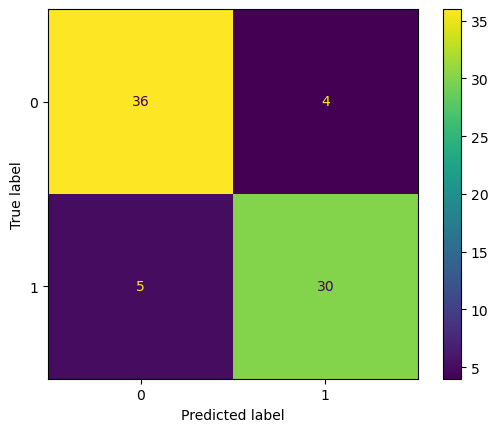

In [208]:
cm=confusion_matrix(y_test, prediction)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

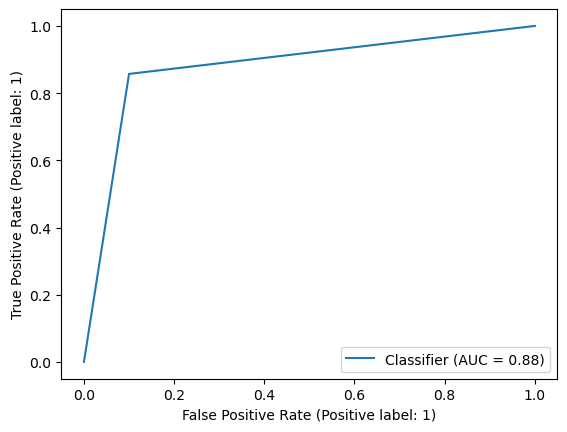

In [212]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, prediction)
plt.show()

In [209]:
#8 Interpretar, analizar y documentar los resultados obtenidos

In [ ]:
# *En la matriz de confusión podemos interpretar que:
    # de 36 personas que se predijo tendrían una enfermedad cardiaca, ninguna de ellas la padecía
    # de 5 personas que se predijo que no tendrían enfermedades cardiacas, todas si padecían de estas
    # de 4 personas que se informaba que padecían enfermedad cardíaca, los 4 no sufrían enfermedad 
    # de 30 personas que se predijo tenrían enfermedad cardiaca, las 30 padecian dicha enfermedad

